In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
from IPython.core.display import display, HTML
warnings.filterwarnings("ignore") # suppress warnings because theyre annoying and i like living on the edge
pd.set_option('display.max_columns',100) # so i can see all columns
np.set_printoptions(linewidth = 220) # increase numpy array print
display(HTML("<style>.container { width:80% !important; }</style>")) # widen jupyter notebook blocks

In [2]:
## import data

work_dir = 'D:/general_data/cc_approval'
df_app = pd.read_csv(work_dir + '/application_record.csv')
df_credit = pd.read_csv(work_dir + '/credit_record.csv')

In [61]:
Counter(df_credit.STATUS)

Counter({'X': 209230,
         '0': 383120,
         'C': 442031,
         '1': 11090,
         '2': 868,
         '3': 320,
         '4': 223,
         '5': 1693})

In [63]:
df_credit = df_credit[df_credit.STATUS != 'X']

In [112]:
def binary_bad(x):
    # 0 for good status, 1 for bad status
    if x in ['0','C']: #['X','C']:
        return 0
    else:
        return 1
    
df_credit['is_risky'] = df_credit.STATUS.map(binary_bad)

In [113]:
df_credit.pivot_table(index = 'ID', values = 'is_risky', aggfunc = 'count')

,is_risky
ID,
5001711,3
5001712,19
5001717,22
5001718,29
5001719,43
...,...
5150480,26
5150482,18
5150484,13


In [114]:
# piv = df_credit.pivot_table(index = 'ID', values = 'is_risky', aggfunc = lambda x: int(sum(x) / float(len(x)) > 0.5))
piv = df_credit.pivot_table(index = 'ID', values = 'is_risky', aggfunc = lambda x: sum(x) / float(len(x)))
piv.columns = ['binary_status']
piv.reset_index(inplace = True)
piv 

,ID,binary_status
0,5001711,0.000000
1,5001712,0.000000
2,5001717,0.000000
3,5001718,0.068966
4,5001719,0.000000
...,...,...
41444,5150480,0.000000
41445,5150482,0.000000
41446,5150484,0.000000
41447,5150485,0.000000


In [115]:
piv.binary_status.sum()

768.7554130082992

In [116]:
id_class_dict = dict(zip(piv.ID, piv.binary_status))

In [117]:
df_app['is_risky'] = df_app['ID'].map(id_class_dict).fillna(2)

In [118]:
from collections import Counter
Counter(df_app['is_risky'])

Counter({0.06666666666666667: 97,
         0.07142857142857142: 87,
         0.0: 28819,
         2.0: 405447,
         0.038461538461538464: 55,
         0.23333333333333334: 3,
         0.06451612903225806: 17,
         0.10526315789473684: 21,
         0.058823529411764705: 67,
         0.1111111111111111: 126,
         0.25: 114,
         0.05: 58,
         0.05555555555555555: 71,
         0.0625: 79,
         0.07692307692307693: 87,
         0.09090909090909091: 124,
         0.2: 120,
         0.09523809523809523: 23,
         0.1: 92,
         0.023255813953488372: 13,
         0.5: 76,
         0.16666666666666666: 129,
         0.08333333333333333: 117,
         0.02127659574468085: 19,
         0.03125: 34,
         0.027777777777777776: 22,
         0.03333333333333333: 37,
         0.021739130434782608: 12,
         0.017241379310344827: 6,
         0.045454545454545456: 48,
         0.375: 16,
         0.2857142857142857: 36,
         0.01694915254237288: 6,
         0.2

In [119]:
df = df_app[df_app['is_risky'] != 2].copy()

In [120]:
class categorical_dictionary:
    'class containing all categorical variables indexed and converted'
    
    def __init__(self):
        self.cat_dict = {}
        self.rev_cat_dict = {}
    
    def add_col(self, vals, col_name, verbose = True):
        cat_vals = set(vals) # get classes
        temp_dict = dict(zip(cat_vals, range(1, len(cat_vals)+1)))
        temp_dict[col_name + '_UNK'] = 0 # adding an index for previously non-existant class 
        self.cat_dict[col_name] = temp_dict
        rev_temp_dict = {j:i for i,j in temp_dict.items()}
        self.rev_cat_dict[col_name] = rev_temp_dict
        if verbose:
            print('Added ' + col_name)
            
    def cat_to_ind(self, vals, col_name):
        def failsafe_mapper(val, col_name):
            'make mapping robust by handling previously unseen classes'
            try:
                mapped_val = self.cat_dict[col_name][val]
            except:
                print('Unknown value: "' + str(val) + '", appending as index 0 (general unknown class index)')
                mapped_val = 0
            return mapped_val
        
        mapped_list = list(map(lambda x: failsafe_mapper(x,col_name), vals))
        return mapped_list
    
    def ind_to_cat(self, vals, col_name):
        return list(map(lambda x: self.rev_cat_dict[col_name][x], vals))

In [75]:
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,is_risky
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434808,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,1.0
434809,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,1.0
434810,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,1.0
434811,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,1.0


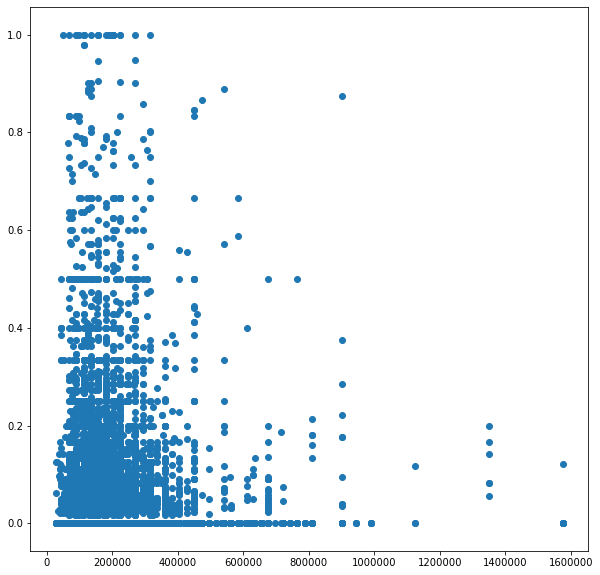

In [121]:
import matplotlib.pyplot as plt

x = df['AMT_INCOME_TOTAL']
y = df['is_risky']
plt.figure(figsize=[10,10])
plt.scatter(x,y)
plt.show()

In [122]:
x_cat_cols = ['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY'] # categorical columns
x_num_cols = ['CNT_CHILDREN','AMT_INCOME_TOTAL'] # numeric columns

cat_dict = categorical_dictionary()
X = df[x_num_cols].copy()
y = df['is_risky'].copy()

for col_ in x_cat_cols:
    cat_dict.add_col(df[col_].values, col_)
    X[col_] = cat_dict.cat_to_ind(df[col_], col_)
    

Added CODE_GENDER
Added FLAG_OWN_CAR
Added FLAG_OWN_REALTY


In [123]:
from sklearn.model_selection import train_test_split

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = 0.2)

In [124]:
from sklearn.metrics import confusion_matrix

class conf_mat_summary:

    def __init__(self, y_true, y_pred): #, labels = None, sample_weight = None  # i am afraid these might break the code lol.
        self.y_true = list(y_true)
        self.y_pred = list(y_pred)
        self.confusion_matrix = confusion_matrix(y_true, y_pred)#, labels, sample_weight)
        self.tn, self.fp, self.fn, self.tp = list(map(float,self.confusion_matrix.ravel()))

        # Calculate the different measures (added 1e-5 at the denominator to avoid 'divide by 0')

        self.error_rate  = (self.fp + self.fn) / (self.tn + self.fp + self.fn + self.tp + 0.00001)
        self.accuracy    = (self.tp + self.tn) / (self.tn + self.fp + self.fn + self.tp + 0.00001)
        self.sensitivity = self.tp / (self.tp + self.fn + 0.00001)
        self.specificity = self.tn / (self.tn + self.fp + 0.00001)
        self.precision   = self.tp / (self.tp + self.fp + 0.00001)
        self.fpr 		 = 1 - self.specificity
        self.f_score     = (2*self.precision*self.sensitivity) / (self.precision + self.sensitivity  + 0.00001)


    def summary(self):

        # gather values 

        names_ = ['Accuracy','Precision/PPV','Sensitivity/TPR/Recall','Specificity/TNR','Error Rate','False Positive Rate (FPR)','F-Score']
        values = [self.accuracy, self.precision, self.sensitivity, self.specificity, self.error_rate, self.fpr, self.f_score]
        values = list(map(lambda x: round(x,4), values))
        results = pd.DataFrame({'Measure':names_, 'Value':values})


        # calculate some formatting stuff to make output nicer

        set_ = set(self.y_true + self.y_pred)
        labels = sorted(list(map(str, set_)))
        max_len_name = max(list(map(len,list(labels))))
        labels = list(map(lambda x: x + ' '*(max_len_name - len(x)), labels))
        dis_bet_class = max([max_len_name, len(str(self.confusion_matrix[0][0])), len(str(self.confusion_matrix[1][0]))])
        extra_0 = dis_bet_class - len(labels[0])
        extra_1 = dis_bet_class - len(str(self.confusion_matrix[0][0]))
        extra_2 = dis_bet_class - len(str(self.confusion_matrix[1][0]))

        # print outputs

        print(' ') # skips a line. idk, maybe it would look nicer in terminal or something
        print(' '*(6 + max_len_name) + 'pred')
        print(' '*(6 + max_len_name) + labels[0] + ' '*(extra_0 + dis_bet_class) + labels[1])
        print('true ' + labels[0] + ' ' + str(self.confusion_matrix[0][0]) + ' '*(extra_1 + dis_bet_class) + str(self.confusion_matrix[0][1]))
        print('     ' + labels[1] + ' ' + str(self.confusion_matrix[1][0]) + ' '*(extra_2 + dis_bet_class) + str(self.confusion_matrix[1][1]))
        print(results)
        


In [125]:
import xgboost as xgb

model = xgb.XGBRegressor() #n_estimators=30, max_depth = 10
model.fit(X_tr, y_tr)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

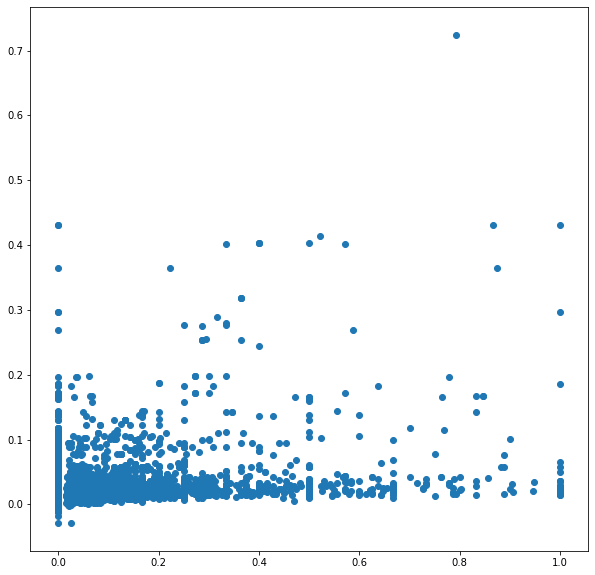

In [126]:

preds = model.predict(X_tr)
## classification
# a = conf_mat_summary(y_true = y_tr, y_pred = preds)
# a.summary()

##regression
plt.figure(figsize = [10,10])
plt.scatter(y_tr, preds)
plt.show()

In [92]:
X_te

,CNT_CHILDREN,AMT_INCOME_TOTAL,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY
21805,0,112500.0,2,1,2
26832,0,112500.0,2,2,1
21060,0,135000.0,2,1,2
3345,1,315000.0,2,1,2
42177,1,180000.0,1,2,2
...,...,...,...,...,...
1402,0,540000.0,2,2,2
27214,1,225000.0,1,1,1
805,0,157500.0,2,1,1
562,0,135000.0,2,1,1


In [93]:
y_te

21805    0.0
26832    1.0
21060    1.0
3345     0.0
42177    0.0
        ... 
1402     1.0
27214    0.0
805      1.0
562      0.0
32939    0.0
Name: is_risky, Length: 6622, dtype: float64

In [95]:
preds

array([1., 1., 1., ..., 1., 1., 1.])

In [94]:
preds = model.predict(X_te)
a = conf_mat_summary(y_true = y_te, y_pred = preds)
a.summary()

 
         pred
         0.0   1.0
true 0.0 289   2428
     1.0 255   3650
                     Measure   Value
0                   Accuracy  0.5948
1              Precision/PPV  0.6005
2     Sensitivity/TPR/Recall  0.9347
3            Specificity/TNR  0.1064
4                 Error Rate  0.4052
5  False Positive Rate (FPR)  0.8936
6                    F-Score  0.7312


In [22]:
preds[preds != 0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [18]:
y

0         1.0
1         1.0
2         0.0
3         0.0
4         0.0
         ... 
434808    1.0
434809    1.0
434810    1.0
434811    1.0
434812    1.0
Name: is_risky, Length: 36457, dtype: float64